In [34]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [35]:
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

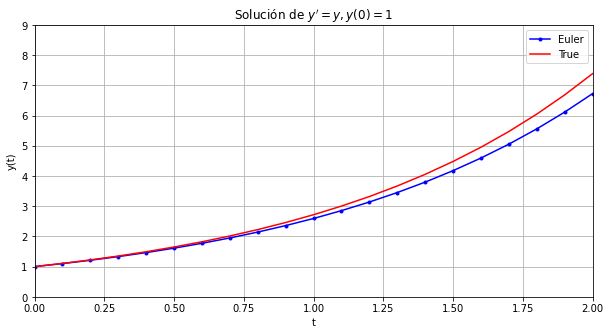

In [36]:
# Solución numérica
# Tomamos un h=0.1
t = np.linspace(0,2,21)
y0 = 1
# Definimos la función f(t,y) = y
f = lambda y,t: y
# La solución de la ecuación diferencial usando el método de Euler
y = odeEuler(f,y0,t)
# La solución analítica conocida
y_true = np.exp(t)

plt.figure(figsize=(10,5))
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid()
plt.title("Solución de $y'=y , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

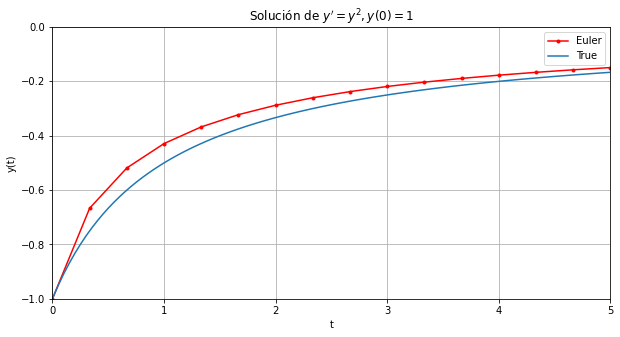

In [38]:
t = np.linspace(0,5,16)
y0 = -1
# Definimos la función f(t,y) = y**2
f = lambda y,t: y**2
# Usamos el método de Euler
y = odeEuler(f,y0,t)
t_true = np.linspace(0,5,100)
y_true = -1/(t_true + 1)

plt.figure(figsize=(10,5))
plt.plot(t,y,'r.-',t_true,y_true)
plt.legend(['Euler','True'])
plt.grid()
plt.axis([0,5,-1,0])
plt.title("Solución de $y'=y^2 , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

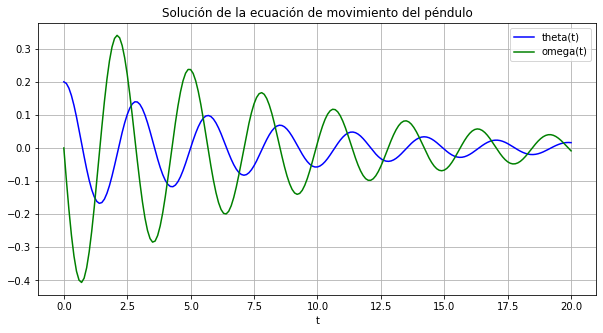

In [39]:
from scipy.integrate import odeint

# Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
# La solución y es un arreglo 1-D, y=(theta, omega), dy/dt es un arreglo

def pendulo(y, t, b, k):
        theta, omega = y
        dydt = [omega, -b*omega - k*theta]
        return dydt

# Definimos las constantes g, la longitud l del péndulo y el coeficiente de fricción b.
g = 9.81
l = 2.0

k = g/l
b = 0.25

# Definimos las condiciones iniciales theta=0.2, y omega = 0 (el péndulo de "suelta")
y0 = [0.2, 0.0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 20, 201)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(pendulo, y0, t, args=(b, k))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='theta(t)')
plt.plot(t, y[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del péndulo')
plt.xlabel('t')
plt.grid()
plt.show()

Ejercicio 1:

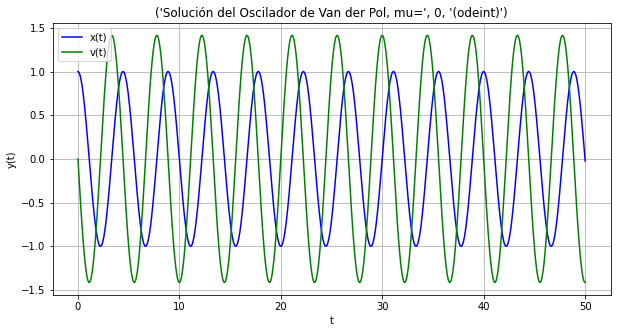

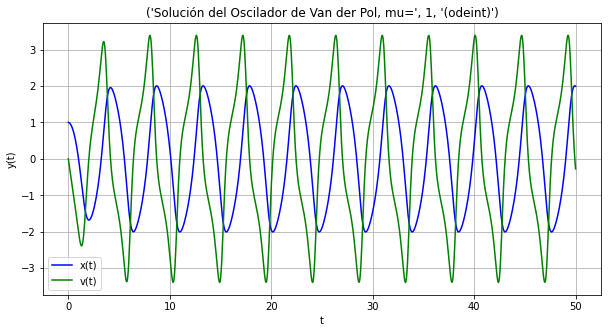

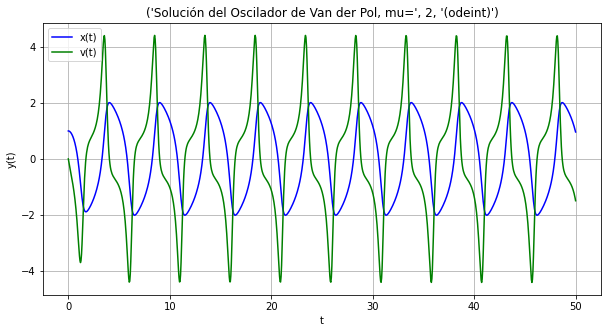

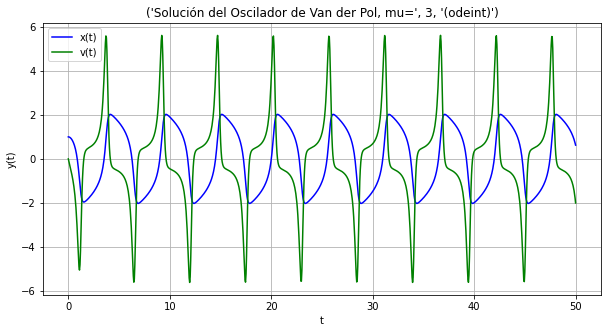

In [40]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def vanderpol(y,t,mu):
       x, v= y
       dydt= [v, -x+mu*(1-x**2)*v-x]
       return dydt

# Definimos las condiciones iniciales
t0=0.0
y0 = [1.0, 0.0]

t = np.linspace(0, 50, 1000)

for mu in range(4):
  y=odeint(vanderpol,y0,t,args=(mu,))
  plt.figure(figsize=(10,5))
  plt.plot(t, y[:,0], 'b', label='x(t)')
  plt.plot(t, y[:,1], 'g', label='v(t)')
  plt.legend(loc='best')
  plt.title(('Solución del Oscilador de Van der Pol, mu=',mu,'(odeint)'))
  plt.xlabel('t')
  plt.ylabel('y(t)')
  plt.grid()
  plt.show()

Ejercicio 2:

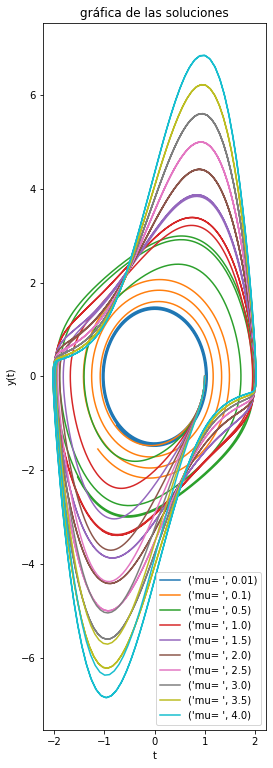

In [41]:
# Definimos las condiciones iniciales
t0=0.0
y0 = [1.0, 0.0]

t = np.linspace(0, 15, 1000)

#Valores de mu
#[0.01,0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]

plt.figure(figsize=(4,13))

for mu in [0.01,0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]:
  y=odeint(vanderpol,y0,t,args=(mu,))
  plt.plot(y[:,0], y[:,1], label=('mu= ', mu))
  plt.legend(loc='best')
  plt.title(('gráfica de las soluciones'))
  plt.xlabel('t')
  plt.ylabel('y(t)')
  plt.grid()
plt.show()

In [42]:
# Tomada la versión de Joshua Simon
# https://github.com/JoshuaSimon/Classic-Fourth-Order-Runge-Kutta-Method-RK4/blob/master/Four_Step_Runge_Kutta_ODE1.py

"""Four_Step_Runge_Kutta_ODE1.py 

Implementation of the classic fourth-order method also refered as the
"original" Runge–Kutta method. This method is an implicit four step
Runge-Kutta method which solves an intial value problem numerically. 
"""

from datetime import datetime
import matplotlib.pyplot as plt
from math import exp, sqrt 

__date__ = datetime(2019, 6, 6) # or version string or something
__author__ = "Joshua Simon"


def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

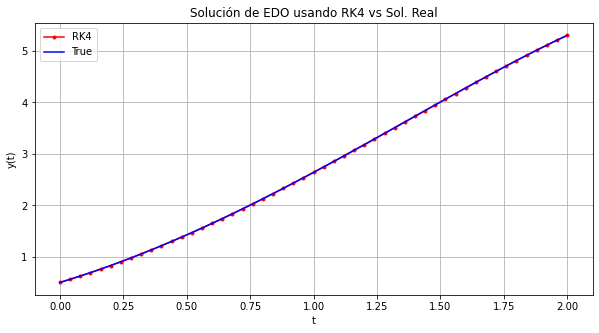

In [43]:
# Definimos la parte derecha de la ecuación
def f(t, y):
    return (y-t**2+1)

# Condiciones iniciales
t_0 = 0.0
y_0 = 0.5

# Paso de integración h
a = 0
b = 2.0 
Npts = 50
h = (b-a)/Npts

t_values = [t_0]
y_values = [y_0]

# Calcula la solución con RK4
t = t_0
y = y_0

for _ in range(Npts):
  t, y = runge_kutta(f, t, y, h)
  t_values.append(t)
  y_values.append(y)


# Graficar la solución

t_true = np.linspace(a,b,Npts)
y_true = t_true**2 + 2*t_true + 1 - 0.5*np.exp(t_true)

plt.figure(figsize=(10,5))
plt.plot(t_values,y_values,'r.-', label='RK4')
plt.plot(t_true,y_true,'b', label='True')
plt.legend(['RK4','True'])
plt.grid()
plt.title("Solución de EDO usando RK4 vs Sol. Real")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

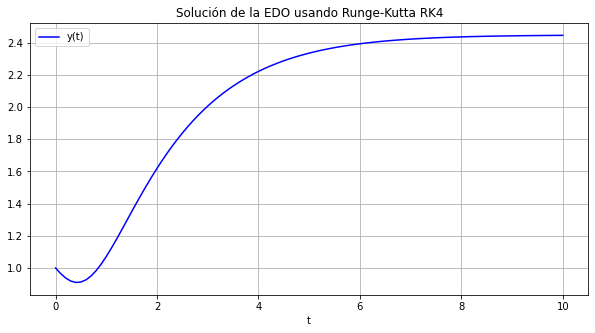

In [45]:
# Ejemplo:

# Definimos la parte derecha de la ecuación
def f(t, y):
    return (5*t**2 - y) / (np.exp(t+y))


# Condiciones iniciales
t_0 = 0.0
y_0 = 1.0

# Paso de integración h = (b-a)/Npts
a=0
b=10.0
Npts=100
h = (b-a)/Npts

t_values = [t_0]
y_values = [y_0]

# Calcula la solución con RK4
t = t_0
y = y_0

for _ in range(Npts):
  t, y = runge_kutta(f, t, y, h)
  t_values.append(t)
  y_values.append(y)
  # Graficar la solución

plt.figure(figsize=(10,5))
plt.plot(t_values, y_values, 'b', label='y(t)')
plt.legend(loc='best')
plt.title('Solución de la EDO usando Runge-Kutta RK4')
plt.xlabel('t')
plt.grid()
plt.show()

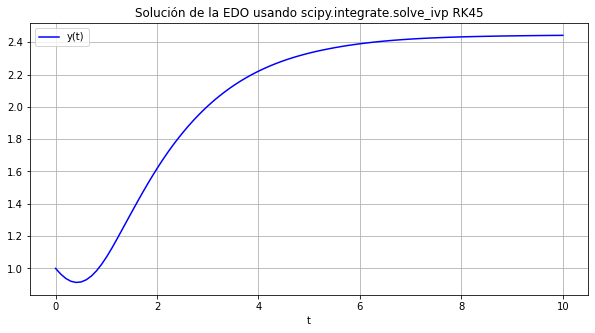

In [46]:

# Definimos la parte derecha de la ecuación
def f(t, y):
    return (5*t**2 - y) / (np.exp(t+y))


# Condiciones iniciales
t_0 = 0.0
y_0 = [1.0]


# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=10.0
Npts=100

# Los puntos de t donde será evaluada la solución.
t=np.linspace(t0,tmax,Npts)

sol = solve_ivp(f, (t0,tmax), y0=y_0, method='RK45', t_eval=t)
# El resultado de la función solve_ip contiene diversa información. 
# La infomación de interés es la solución numérica 'sol.y[0]'

y = sol.y[0]

# Graficar la solución
plt.figure(figsize=(10,5))
plt.plot(t, y, 'b', label='y(t)')
plt.legend(loc='best')
plt.title('Solución de la EDO usando scipy.integrate.solve_ivp RK45')
plt.xlabel('t')
plt.grid()
plt.show()

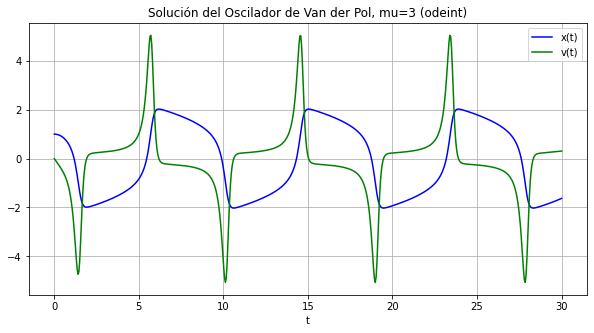

In [47]:
# Integración utilizando 'odeint'

from scipy.integrate import solve_ivp, odeint

# definimos la función F de lado derecho de la ecuación.
def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt


# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=30.0
Npts=600

# Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts)

# Definimos el coeficiente mu
mu=3.0

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [1.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)
#print(t)
#print(sol[:,0],sol[:,1])

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'b', label='x(t)')
plt.plot(t, y2, 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu=3 (odeint)')
plt.xlabel('t')
plt.grid()
plt.show()

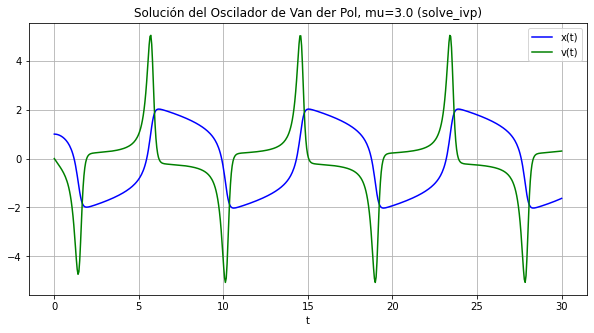

In [48]:
# Utilizando scipy.integrate.solve_ivp

from scipy.integrate import solve_ivp, odeint

# definimos la función F de lado derecho de la ecuación.
def VanderPol(t,y,mu):
      dydt = [y[1], mu*(1 - y[0]**2)*y[1] - y[0]]
      return dydt

# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=30.0
Npts=600

# Condiciones iniciales
# Definimos el coeficiente mu
mu=3.0

# Definimos las condiciones iniciales 
t_0 = 0.0
y_0 = [1.0, 0.0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(t0,tmax,Npts)

abserr = 1.0e-8
relerr = 1.0e-6
sol = solve_ivp(lambda t, y, mu: VanderPol(t, y, mu),(t0,tmax), y0=y_0, method='RK45', t_eval=t, args=(mu,), rtol=relerr, atol=abserr)
#print(sol)

# La solución regresa ambas x(t) y v(t)
y1=sol.y[0]
y2=sol.y[1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'b', label='x(t)')
plt.plot(t, y2, 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu=3.0 (solve_ivp)')
plt.xlabel('t')
plt.grid()
plt.show()

Ejercicio 3.1:

Euler

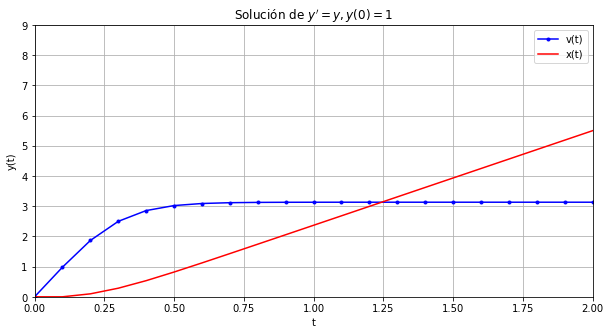

In [49]:
# Solución numérica
# Tomamos un h=0.1
def EC(y, t, k, g):
        x, v = y
        dydt = [v, -k*v**2 + g]
        return dydt
t = np.linspace(0,2,21)
t0=0
v0=0
x0=0
k=1
g=9.81

#primera ecuacion
# Definimos la función f(t,y) = y
f = lambda v,t: -k*v**2 + g
v = np.zeros(len(t))
v[0] = v0

for n in range(0,len(t)-1):
 v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])

#segunda ecuación
x = np.zeros(len(t))
x[0] = x0

for n in range(0,len(t)-1):
 x[n+1] = x[n] + v[n]*(t[n+1] - t[n])

plt.figure(figsize=(10,5))
plt.plot(t,v,'b.-',t,x,'r-')
plt.legend(['v(t)','x(t)'])
plt.axis([0,2,0,9])
plt.grid()
plt.title("Solución de $y'=y , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

Runge Kutta

In [70]:
def run_kutt(f, y_0, x_0, h):
  k_0 = f(y_0, x_0)
  k_1 = f(y_0 + h/2 * k_0, x_0 + h/2)
  k_2 = f(y_0 + h/2 * k_1, x_0 + h/2)
  k_3 = f(y_0 + h * k_2, x_0 + h)

  k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

  x_1 = x_0 + h
  y_1 = y_0 + h * k

  return x_1,y_1

In [72]:
# Paso de integración h
a = 8
b = 0
Npts = 800
h = (b-a)/Npts

# Condiciones iniciales
t0=0
v0=0
x0=0
t=[t0]
v=[v0]
t1=0
v1=0
k=1
g=9.81

for n in range(Npts):
 t1,v1 = run_kutt(Ec1, t1, v1, h)
 t.append(t1)
 v.append(v1)

def Ec1(y,t):
  x, v = y
  dydt=[v, -k*v**2 + g]
  return dydt
y0=[x0,v0]
t=np.linspace(a,b,Npts+1)
y=odeint(Ec1,y0,t)
  # Graficar la solución

plt.figure(figsize=(10,5))
plt.plot(t,x,'r',label='x(t)')
plt.plot(t,v,'b',label='v(t)')
plt.title(('Gráfica de las soluciones para $k = $',k,' [Euler]'))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

TypeError: ignored

Debido a las condiciones del ejercicio solo se puede ejecutar, con la informacion dada, de la siguiente forma:


In [73]:
def runge_kutta(f, x_0, y_0, h):
  k_0 = f(y_0, x_0)
  k_1 = f(y_0 + h/2 * k_0, x_0 + h/2)
  k_2 = f(y_0 + h/2 * k_1, x_0 + h/2)
  k_3 = f(y_0 + h * k_2, x_0 + h)

  k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

  x_1 = x_0 + h
  y_1 = y_0 + h * k

  return x_1,y_1

# Paso de integración h
a = 8
b = 0
Npts = 800
h = (b-a)/Npts

# Condiciones iniciales
t0=0
v0=0
x0=0
t=[t0]
v=[v0]
t1=0
v1=0

for n in range(Npts):
 t1,v1 = runge_kutta(Ec1, t1, v1, h)
 t.append(t1)
 v.append(v1)

def Ec1(y,t):
  x, v = y
  dydt=[v, -k*v**2 + g]
  return dydt
y0=[x0,v0]
t=np.linspace(a,b,Npts+1)
y=odeint(Ec1,y0,t)
  # Graficar la solución

plt.figure(figsize=(10,5))
plt.plot(t,x,'r',label='x(t)')
plt.plot(t,v,'b',label='v(t)')
plt.title(('Gráfica de las soluciones para $k = $',k,' [Euler]'))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

TypeError: ignored

Ejercicion 4:

In [60]:
def Ec2(t,h):
 y, u = h
 dydt=[u, -(2/t)*u-y**5]
 return dydt

y0=[1.0,0.0]
t=np.linspace(0.001,25.0,800)

y=odeint(Ec2,y0,t)

x=y[0:801,0]
v=y[0:801,1]

plt.figure(figsize=(10,5))
plt.plot(t,v,'b.-',t,x,'r-')
plt.legend(['v(t)','x(t)'])
plt.axis([0,2,0,9])
plt.grid()
plt.title("Solución de $y'=y , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


TypeError: ignored

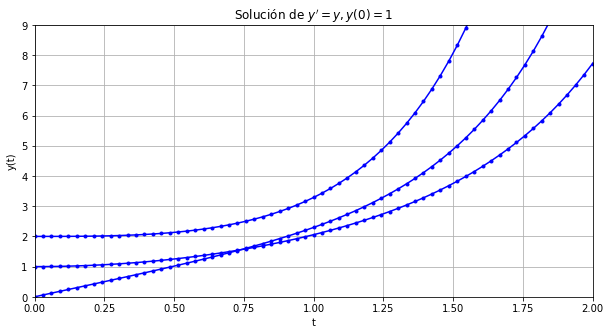

In [55]:
def Ec3(v,t):
  y, u, w = v
  dvdt=[u, w, (t-1)**2+y**2+u-2]
  return dvdt

y0=[1.0,0.0,2.0]
tm=3.0
t0=0
Npts=100

t=np.linspace(t0,tm,Npts)

y=odeint(Ec3,y0,t)
y1=y[0: ,0]
y2=y[0: ,1]
y3=y[0: ,2]

plt.figure(figsize=(10,5))
plt.plot(t,y1,'b.-',label='y(t)')
plt.plot(t,y2,'b.-',label='u(t)')
plt.plot(t,y3,'b.-',label='w(t)')
plt.axis([0,2,0,9])
plt.grid()
plt.title("Solución de $y'=y , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


